In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from scipy.fft import fft2
from scipy.fft import fftfreq
from skimage.filters import window
from scipy.ndimage import gaussian_filter

In [2]:
def plot_spatial_spectrum(slice, windowing='hann', pixel_size=1, precision=0):
    
    def set_ticks(ax, fs, half_N, precision=precision):
        ticks = range(0, half_N+1)
        ticklabels = ["{:.0f}".format(p) for p in (pixel_size/fs[:half_N+1])]
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticklabels)
        ax.set_xlim(-0.5, half_N+0.5)
#         from matplotlib.ticker import FormatStrFormatter
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        
        ax.set_yticks(ticks)
        ax.set_yticklabels(ticklabels)
        ax.set_ylim(-0.5, half_N+0.5)
    
    N = slice.shape[0]    
#     height, width = slice.shape
    if N % 2 ==0: # for even
        half_N = int(N/2-1)
    else:
        half_N = int((N-1)/2)
    print(half_N)
        
        
    w = fft2(slice * window(windowing, slice.shape))

    fs = fftfreq(N)
    
    plt.imshow(np.abs(w), cmap='gray', origin='lower')

    set_ticks(plt.gca(), fs, half_N, precision=3)
    
    plt.xlabel('period (um)')
    plt.ylabel('period (um)')
    
    
def box_off():
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [3]:
# # stim pixel size
# height=13
# width=13
# pixel_size = 132 #um

height=26
width=26
pixel_size = 66 #um

## binary stim

0.497463894839851


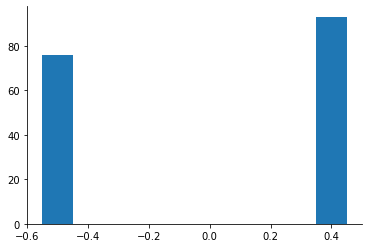

In [4]:
stim = np.random.randint(2, size=(height,width))
stim = stim - np.mean(stim.ravel())

print(np.std(stim.ravel()))

plt.hist(stim.ravel())
box_off()

6


/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


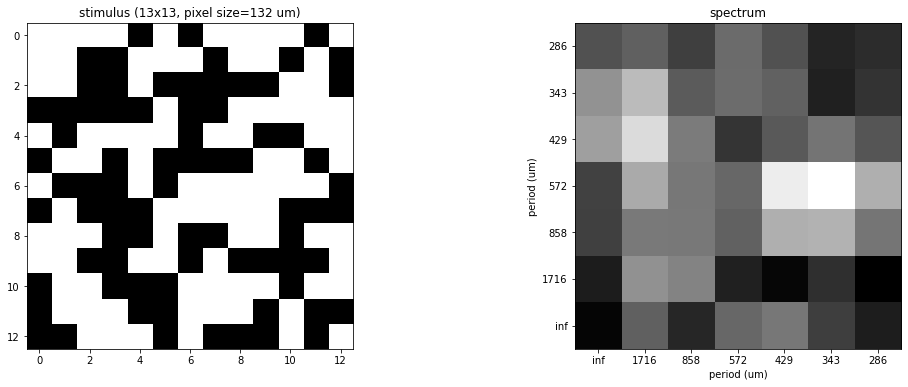

In [5]:
# binary stim
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(stim, cmap='gray')
plt.title('stimulus ({:d}x{:d}, pixel size={:2} um)'.format(width,height,pixel_size))

plt.subplot(122)
plot_spatial_spectrum(stim, pixel_size=pixel_size)
plt.title('spectrum')


plt.savefig('figure/stim_{}x{}_binary.png'.format(width,height), bbox_inches='tight')

### smoothed binary stim

0.1416673155117501


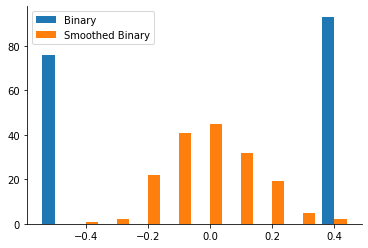

In [6]:
sigma = 1
smoothed_stim = gaussian_filter(stim, sigma=sigma)

print(np.std(smoothed_stim.ravel()))

plt.hist([stim.ravel(), smoothed_stim.ravel()])
plt.legend(['Binary', 'Smoothed Binary'])
box_off()

6


/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


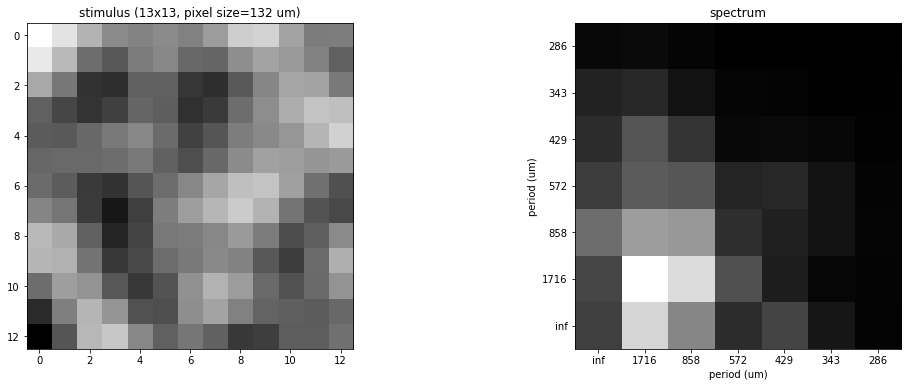

In [7]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(smoothed_stim, cmap='gray')
plt.title('stimulus ({:d}x{:d}, pixel size={:2} um)'.format(width,height,pixel_size))

plt.subplot(122)
plot_spatial_spectrum(smoothed_stim, pixel_size=pixel_size)
plt.title('spectrum')

plt.savefig('figure/stim_{}x{}_binary_smoothed.png'.format(width,height), bbox_inches='tight')

## Gaussian stim

0.48496554126200403


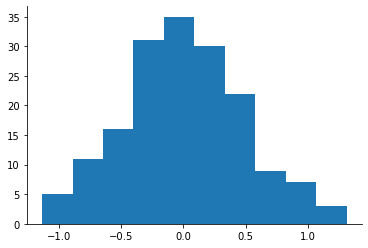

In [8]:
stim = 0.5 * np.random.randn(height,width) # multipy 0.5 to keep the same variance
stim = stim - np.mean(stim.ravel())

print(np.std(stim.ravel()))

plt.hist(stim.ravel())
box_off()

6


/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


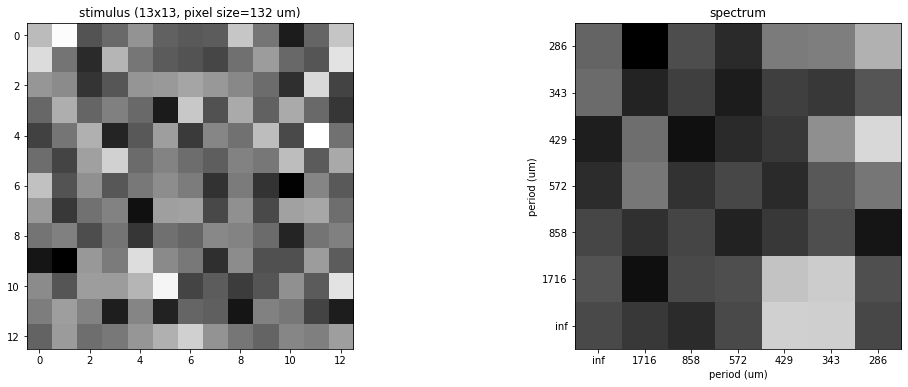

In [9]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(stim, cmap='gray')
plt.title('stimulus ({:d}x{:d}, pixel size={:2} um)'.format(width,height,pixel_size))

plt.subplot(122)
plot_spatial_spectrum(stim, pixel_size=pixel_size)
plt.title('spectrum')

plt.savefig('figure/stim_{}x{}_gauss.png'.format(width,height), bbox_inches='tight')

### Smoothed Gaussian

0.13919072353290599


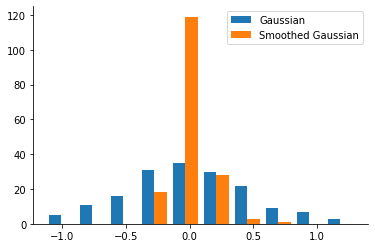

In [10]:
sigma = 1
smoothed_stim = gaussian_filter(stim, sigma=sigma)

print(np.std(smoothed_stim.ravel()))

plt.hist([stim.ravel(), smoothed_stim.ravel()])
plt.legend(['Gaussian', 'Smoothed Gaussian'])
box_off()

6


/Users/yyoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


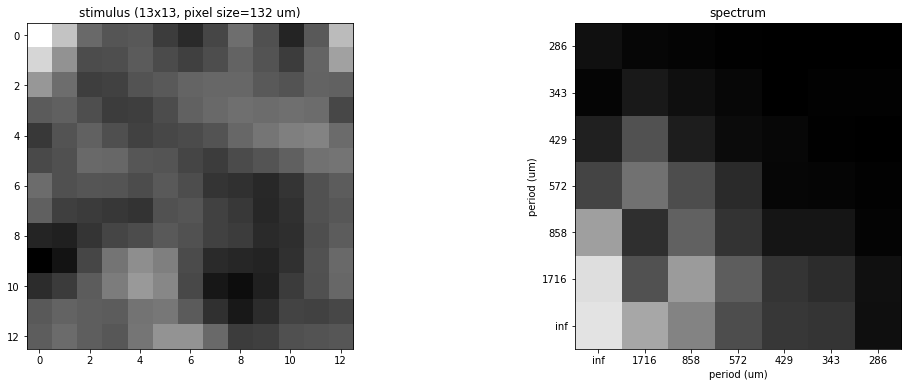

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.imshow(smoothed_stim, cmap='gray')
plt.title('stimulus ({:d}x{:d}, pixel size={:2} um)'.format(width,height,pixel_size))

plt.subplot(122)
plot_spatial_spectrum(smoothed_stim, pixel_size=pixel_size)
plt.title('spectrum')

plt.savefig('figure/stim_{}x{}_gauss_smoothed.png'.format(width,height), bbox_inches='tight')